In [79]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [80]:
train = pd.read_csv('Datasets/BigmartTrain.csv')
test = pd.read_csv('Datasets/BigmartTest.csv')

In [81]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [82]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [83]:
train.shape

(8523, 12)

In [84]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [85]:
test.shape

(5681, 11)

In [86]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [87]:
train['source'] = 'train'
test['source'] = 'test'
df = pd.concat([train, test], ignore_index = True )
print(df.shape)

(14204, 13)


In [88]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [89]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [90]:
#Checking for missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [91]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [92]:
df.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [93]:
import datetime 

current_year = datetime.datetime.now().year
df['Outlet_Age'] = current_year - df['Outlet_Establishment_Year']
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,14


In [94]:
df.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [95]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

In [96]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    4655
Small     3980
High      1553
Name: count, dtype: int64

In [97]:
# The value most common
df['Outlet_Size'].mode()[0]

'Medium'

In [98]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [99]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

<Axes: >

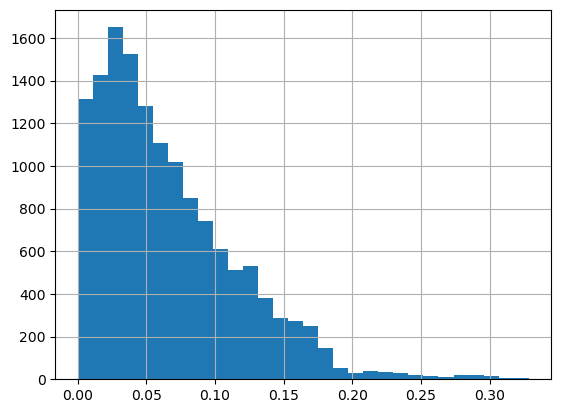

In [100]:
df['Item_Visibility'].hist(bins = 30)

In [101]:
Q1 = df['Item_Visibility'].quantile(0.25)
Q1

0.027035682499999998

In [102]:
Q3 = df['Item_Visibility'].quantile(0.75)
Q3

0.0940372535

In [103]:
IQR = Q3 - Q1
IQR

0.06700157100000001

In [104]:
fill_data = df.query('(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR) ')

In [105]:
fill_data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,14


In [106]:
fill_data.shape

(13943, 14)

In [107]:
df.shape

(14204, 14)

In [108]:
df = fill_data

In [109]:
df.shape

(13943, 14)

In [110]:
df['Item_Visibility_bins'] = pd.cut(df['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], labels = ['Low Viz', 'Viz', 'High Viz']) 

In [111]:
df['Item_Visibility_bins'].value_counts()

Item_Visibility_bins
Low Viz     7363
Viz         4283
High Viz    1418
Name: count, dtype: int64

In [112]:
df['Item_Visibility_bins'] = df['Item_Visibility_bins'].astype('object')
df['Item_Visibility_bins'].replace(np.nan, 'Low Viz', inplace=True)

In [113]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5568
source                          0
Outlet_Age                      0
Item_Visibility_bins            0
dtype: int64

In [114]:
df['Item_Visibility_bins']

0         Low Viz
1         Low Viz
2         Low Viz
3         Low Viz
4         Low Viz
           ...   
14199     Low Viz
14200    High Viz
14201         Viz
14202     Low Viz
14203         Viz
Name: Item_Visibility_bins, Length: 13943, dtype: object

In [115]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [116]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')

In [117]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

In [118]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [119]:
le = LabelEncoder()

In [120]:
df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])

In [121]:
df['Item_Visibility_bins'] = le.fit_transform(df['Item_Visibility_bins'])

In [122]:
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])

In [123]:
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])

In [124]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [125]:
dummy = pd.get_dummies(df['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,False,True,False,False
1,False,False,True,False
2,False,True,False,False
3,True,False,False,False
4,False,True,False,False


In [126]:
df['Item_Identifier']

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 13943, dtype: object

In [127]:
df['Item_Identifier'].value_counts()

Item_Identifier
FDE33    10
FDM12    10
FDY47    10
FDT03    10
FDO01    10
         ..
FDA10     7
FDO33     7
FDZ60     7
NCW54     7
FDG21     7
Name: count, Length: 1559, dtype: int64

In [128]:
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
df['Item_Type_Combined']

0        FD
1        DR
2        FD
3        FD
4        NC
         ..
14199    FD
14200    FD
14201    NC
14202    FD
14203    FD
Name: Item_Type_Combined, Length: 13943, dtype: object

In [129]:
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD': 'Food',
                                                                     'DR': 'Drinks',
                                                                     'NC': 'Non-Consumable'})

In [130]:
df['Item_Type_Combined'].value_counts()

Item_Type_Combined
Food              9991
Non-Consumable    2652
Drinks            1300
Name: count, dtype: int64

In [131]:
df.shape

(13943, 16)

In [132]:
df = pd.get_dummies(df, columns = ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Item_Type_Combined'])

In [133]:
df.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
source                                object
Outlet_Age                             int64
Item_Visibility_bins                   int32
Item_Fat_Content_0                      bool
Item_Fat_Content_1                      bool
Outlet_Location_Type_0                  bool
Outlet_Location_Type_1                  bool
Outlet_Location_Type_2                  bool
Outlet_Size_0                           bool
Outlet_Size_1                           bool
Outlet_Size_2                           bool
Outlet_Type_Grocery Store               bool
Outlet_Type_Supermarket Type1           bool
Outlet_Type_Supermarket Type2           bool
Outlet_Typ

In [134]:
import warnings
warnings.filterwarnings('ignore')

df.drop(['Item_Type', 'Outlet_Establishment_Year'], axis = 1, inplace = True )



train = df.loc[df['source'] == 'train']
test = df.loc[df['source'] == 'test']

test.drop(['Item_Outlet_Sales', 'source'], axis= 1, inplace = True)
train.drop(['source'], axis= 1, inplace = True)

train.to_csv('Datasets/train_modified.csv', index = False)
test.to_csv('Datasets/test_modified.csv', index = False)

In [135]:
train2 = pd.read_csv('Datasets/train_modified.csv')
test2 = pd.read_csv('Datasets/test_modified.csv')

In [136]:
train2.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Identifier                     object
Item_Outlet_Sales                    float64
Outlet_Age                             int64
Item_Visibility_bins                   int64
Item_Fat_Content_0                      bool
Item_Fat_Content_1                      bool
Outlet_Location_Type_0                  bool
Outlet_Location_Type_1                  bool
Outlet_Location_Type_2                  bool
Outlet_Size_0                           bool
Outlet_Size_1                           bool
Outlet_Size_2                           bool
Outlet_Type_Grocery Store               bool
Outlet_Type_Supermarket Type1           bool
Outlet_Type_Supermarket Type2           bool
Outlet_Type_Supermarket Type3           bool
Item_Type_Combined_Drinks               bool
Item_Type_Combined_Food                 bool
Item_Type_

In [137]:
X_train = train2.drop(['Item_Outlet_Sales', 'Outlet_Identifier', 'Item_Identifier'], axis = 1)
y_train  = train2.Item_Outlet_Sales

In [138]:
X_test = test2.drop(['Outlet_Identifier', 'Item_Identifier'], axis = 1)

In [139]:
X_test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,20.750000,0.007565,107.8622,24,1,True,False,True,False,False,False,True,False,False,True,False,False,False,True,False
1,8.300000,0.038428,87.3198,16,1,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False
2,14.600000,0.099575,241.7538,25,2,True,False,False,False,True,False,True,False,True,False,False,False,False,False,True
3,7.315000,0.015388,155.0340,16,1,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False
4,12.792854,0.118599,234.2300,38,2,False,True,False,False,True,False,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,10.500000,0.013496,141.3154,26,1,False,True,True,False,False,False,False,True,False,True,False,False,False,True,False
5564,7.600000,0.142991,169.1448,14,0,False,True,False,False,True,False,True,False,False,False,True,False,False,True,False
5565,10.000000,0.073529,118.7440,21,2,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True
5566,15.300000,0.000000,214.6218,16,1,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False


In [140]:
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,9.30,0.016047,249.8092,24,1,True,False,True,False,False,False,True,False,False,True,False,False,False,True,False
1,5.92,0.019278,48.2692,14,1,False,True,False,False,True,False,True,False,False,False,True,False,True,False,False
2,17.50,0.016760,141.6180,24,1,True,False,True,False,False,False,True,False,False,True,False,False,False,True,False
3,19.20,0.000000,182.0950,25,1,False,True,False,False,True,False,True,False,True,False,False,False,False,True,False
4,8.93,0.000000,53.8614,36,1,True,False,False,False,True,True,False,False,False,True,False,False,False,False,True


In [141]:
y_train.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [142]:
xtrain,xtest, ytrain, ytest = model_selection.train_test_split(X_train, y_train, test_size = 0.3, random_state = 42) 

In [143]:
lin = LinearRegression()

In [144]:
lin.fit(xtrain, ytrain)

LinearRegression()

In [145]:
print(lin.coef_)
lin.intercept_

[-1.92692654e+00 -3.32746294e+02  1.58826212e+01 -3.19549640e+01
 -1.41755050e+01 -1.45901761e+00  1.45901761e+00  1.88878689e+02
  4.79867957e+01 -2.36865485e+02  5.39642616e+02 -3.11411308e+02
 -2.28231308e+02 -1.63576909e+03 -1.25872012e+02 -3.48803423e+02
  2.11044453e+03  8.83932211e+00  3.46875666e+01 -4.35268887e+01]


1115.2429671873676

In [146]:
predictions = lin.predict(xtest)
predictions

array([2070.25767998, 3705.69772   , 2962.46996681, ..., 3533.89305865,
       3477.22169198, 1241.7263815 ])

In [147]:
import math 

In [148]:
print(math.sqrt(mean_squared_error(ytest, predictions)))

1126.4071066411782


In [149]:
y_sales_pred = lin.predict(X_test)
y_sales_pred

array([1789.6058103 , 1594.72524585, 1837.40378278, ..., 1823.78563072,
       3615.91286916, 1276.90636874])

In [150]:
test_predict = pd.DataFrame({
    'Item_Identifier' : test2['Item_Identifier'],
    'Outlet_Identifier' : test2['Outlet_Identifier'],
    'Item_Outlet_Sales' : y_sales_pred
},columns = ['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [151]:
test_predict

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1789.605810
1,FDW14,OUT017,1594.725246
2,NCN55,OUT010,1837.403783
3,FDQ58,OUT017,2676.850457
4,FDY38,OUT027,5126.989630
...,...,...,...
5563,FDB58,OUT046,2360.895690
5564,FDD47,OUT018,2431.178290
5565,NCO17,OUT045,1823.785631
5566,FDJ26,OUT017,3615.912869


# Quick Recap


Made a hypothesis about the data without looking at it 

Moved on to data exploration and found some nuances in the data which required remediation.

Performed data cleaning and feature engineering and imputed the missing values and soloved other irregulaties

Made new features and also made the data model-friendly using one-hot encoding

Bulit a regression model